<a href="https://colab.research.google.com/github/JesseKiguta/water-quality-model-assignment/blob/main/Nina_formative_II_starter_code_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Excercise - Creating our own custom Model

This is a notebook that provides a quick overview of how to create your own custom model. You will be creating a simple model.
You will be utilizing Keras and Tensorflow


## Water Quality Dataset

This dataset contains water quality measurements and assessments related to potability, which is the suitability of water for human consumption. The dataset's primary objective is to provide insights into water quality parameters and assist in determining whether the water is potable or not. Each row in the dataset represents a water sample with specific attributes, and the "Potability" column indicates whether the water is suitable for consumption.

https://www.kaggle.com/datasets/uom190346a/water-quality-and-potability?select=water_potability.csv


In [58]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [59]:
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/water_potability - water_potability.csv')
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [60]:
# displaying missing values
data.isnull().sum()

,0
ph,491
Hardness,0
Solids,0
Chloramines,0
Sulfate,781
Conductivity,0
Organic_carbon,0
Trihalomethanes,162
Turbidity,0
Potability,0


In [61]:
# filling in the missing values using mean because the columns are normally distributed.
data.fillna({
    'ph': data['ph'].mean(),
    'Sulfate': data['Sulfate'].mean(),
    'Trihalomethanes': data['Trihalomethanes'].mean()
}, inplace=True)

In [62]:
# checking for missing values
data.isnull().sum()

,0
ph,0
Hardness,0
Solids,0
Chloramines,0
Sulfate,0
Conductivity,0
Organic_carbon,0
Trihalomethanes,0
Turbidity,0
Potability,0


Plot the Data Appropriately

In [63]:
# splitting into Features and Target
X = data.drop('Potability', axis=1)
y = data['Potability']


In [64]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Scaling the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

#Splitting the data into Training, Validation & Testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.7, random_state=42)
X_Val, X_test, y_Val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [65]:
num_features = X_train.shape[1]

# Each Member Defines their model Here

In [100]:
#Model Definition by member 1
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Activation
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping



def model_Nina():
  model = Sequential()

  #input layer
  model.add(Dense(256, kernel_regularizer=l2(0.001), input_dim=num_features))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(Dropout(0.3))

  #Layer 1
  model.add(Dense(128, kernel_regularizer=l2(0.01)))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(Dropout(0.3))

  #Layer 2
  model.add(Dense(64, kernel_regularizer=l2(0.01)))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(Dropout(0.3))

  #Layer 3
  model.add(Dense(32, kernel_regularizer=l2(0.01)))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(Dropout(0.3))

  #Output Layer
  model.add(Dense(1, activation='sigmoid'))

  #Compiling the model
  model.compile(
      loss='binary_crossentropy',
      optimizer=Adam(learning_rate=0.001),
      metrics=['accuracy']
  )


  return model

model = model_Nina()
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_64 (Dense)                     │ (None, 256)                 │           2,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_51               │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_51 (Activation)           │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_51 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_65 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_52               │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_52 (Activation)           │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_52 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_66 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_53               │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_53 (Activation)           │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_53 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_67 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_54               │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_54 (Activation)           │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_54 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_68 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 47,745 (186.50 KB)

 Trainable params: 46,785 (182.75 KB)

 Non-trainable params: 960 (3.75 KB)

# Start the training Process

Train: 0.682, Test: 0.545


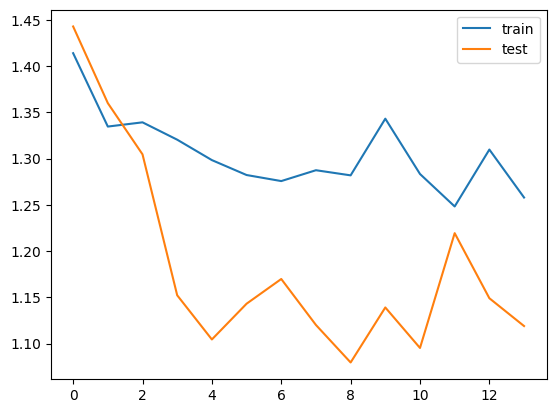

In [128]:
import matplotlib.pyplot as plt

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
#fit model
history = model.fit(
    X_train, y_train,
    validation_data=(X_Val, y_Val),
    epochs=500,
    class_weight = {0:1, 1:5},
    batch_size=32,
    verbose=0,
    callbacks=[early_stopping]
    )
# evaluate the model
_, train_acc = model.evaluate(X_train, y_train, verbose=0)
_, test_acc = model.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot training history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [131]:
# Evaluating model performance

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# predicting on X_test
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.6).astype(int)

# Calculating Precision, Recall & F1 scores
precision = precision_score(y_test, y_pred)
recall = recall_score(y_pred, y_test)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

#Calculating confusion matrix
cmat = confusion_matrix(y_test, y_pred)

print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")
print(f"Accuracy: {accuracy:.3f}")
print(f"Confusion Matrix:\n {cmat}")


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Precision: 0.486
Recall: 0.486
F1 Score: 0.596
Accuracy: 0.582
Confusion Matrix:
 [[313 375]
 [105 354]]


1. 4000 epochs, 0.3 dropout, 0.1 l2, the model overfit because the validation loss line started increasing suggestion overfitting. Train: 0.899, Test: 0.642
2. 500 epoch, 0.5 dropout, 0.01 l2, early stopping patience 10, decision threshold 0.5.
Train Loss: **0.716**
Test Loss: **0.649**
Precision: **0.644**
Recall: **0.644**
F1 Score: **0.383**
Accuracy: **0.649**
Confusion Matrix:
 [[619  69]
 [334 125]]
3. 500 epoch, 0.5 dropout, 0.001 l2, early stopping patience 10, decision threshold 0.4, introduced class weights. Precision: 0.457
Train Loss: **0.683**
Test Loss: **0.625**
Recall: **0.457**
F1 Score: **0.605**
Accuracy: **0.532**
Confusion Matrix:
 [[198 490]
 [ 47 412]]
4. 700 epoch, 0.5 dropout, 0.005 l2, early stopping patience 10, decision threshold 0.35, class_weight = {0:1.5, 1:1}. Train: **0.701**, Test: **0.657**. Precision: **0.570**
Recall: **0.570**
F1 Score: **0.498**
Accuracy: **0.643**
Confusion Matrix:
 [[535 153]
 [256 203]]
5. 700 epoch, 0.3 dropout, 0.001 l2, early stopping patience 5, decision threshold 0.6, class_weight = {0:1, 1:5}. Train: **0.682**, Test: **0.545**.
Precision: **0.486**
Recall: **0.486**
F1 Score: **0.596**
Accuracy: **0.582**
Confusion Matrix:
 [[313 375]
 [105 354]]